In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'D:/Final DataSet/SkinDiseaseDataset',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5096 files belonging to 18 classes.
Using 4077 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'D:/Final DataSet/SkinDiseaseDataset',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5096 files belonging to 18 classes.
Using 1019 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)


['Acne', 'Actinic keratosis', 'Allergic contact dermatitis', 'Dyshidrotic Eczema', 'Eczema', 'Flat Wart', 'Impetigo', 'Lichen planus', 'Melasma', 'Psoriasis', 'Rosacea', 'Scabies', 'Seborrheic Dermatitis', 'Seborrheic Keratosis', 'Tinea', 'Urticaria', 'Vitiligo', 'Wart']


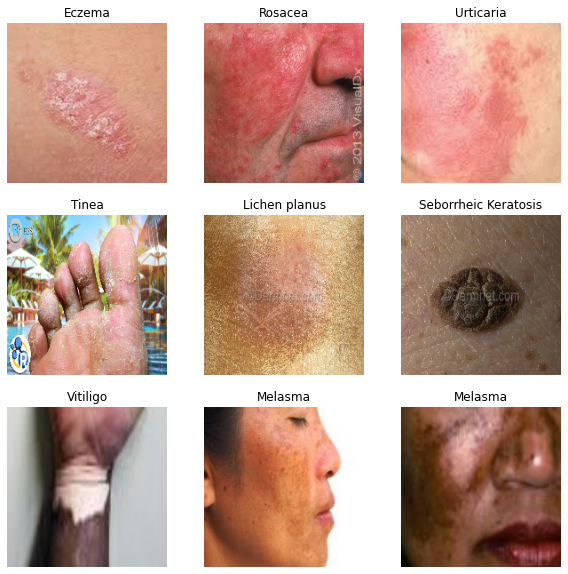

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [11]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.10000019 1.0


In [13]:
num_classes = 18

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)       

In [16]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
128/128 [==============================] - 266s 2s/step - loss: 2.7312 - accuracy: 0.1648 - val_loss: 2.6064 - val_accuracy: 0.2228
Epoch 2/15
128/128 [==============================] - 168s 1s/step - loss: 2.5444 - accuracy: 0.2391 - val_loss: 2.4533 - val_accuracy: 0.2561
Epoch 3/15
128/128 [==============================] - 166s 1s/step - loss: 2.4035 - accuracy: 0.2740 - val_loss: 2.4524 - val_accuracy: 0.2640
Epoch 4/15
128/128 [==============================] - 166s 1s/step - loss: 2.3286 - accuracy: 0.3039 - val_loss: 2.3235 - val_accuracy: 0.2964
Epoch 5/15
128/128 [==============================] - 169s 1s/step - loss: 2.2603 - accuracy: 0.3171 - val_loss: 2.2659 - val_accuracy: 0.3032
Epoch 6/15
128/128 [==============================] - 170s 1s/step - loss: 2.1882 - accuracy: 0.3319 - val_loss: 2.3522 - val_accuracy: 0.2915
Epoch 7/15
128/128 [==============================] - 171s 1s/step - loss: 2.1443 - accuracy: 0.3490 - val_loss: 2.2929 - val_accuracy: 0.3091

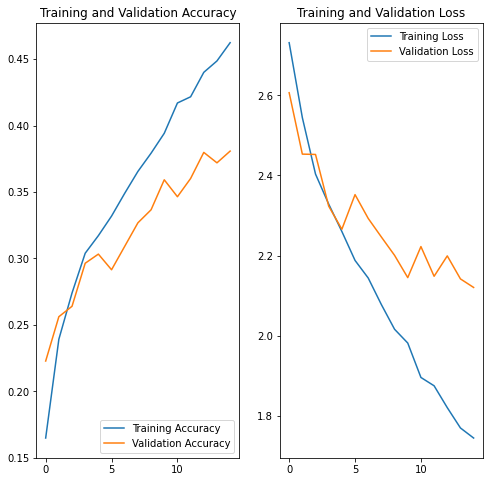

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
import os

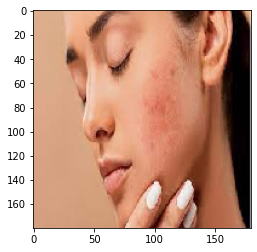

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("G:/dataset/Sample/Eczema.jpg",target_size=(180,180))
plt.imshow(img_pred)
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)
rslt=model.predict(img_pred)

score = tf.nn.softmax(rslt[0])


In [23]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 10 * np.max(rslt))
)

This image most likely belongs to Eczema with a 42.19 percent confidence.


In [26]:
model.save('Skindiseasemodel.h5')

In [ ]:
#this code will help to findout the format of your image in image dataset 

import tensorflow as tf
import os

def validate_image(file_name):
    tf.py_function(tf.print, inp=[file_name], Tout=[])
    image = tf.io.read_file(file_name)
    image = tf.io.decode_image(image, channels=3)
    return image

os.chdir(r'D:/Final DataSet/SkinDiseaseDataset/Wart')

accepted_extensions = ('jpg', 'png', 'bmp', 'gif')

files = list(filter(lambda x: x.lower().endswith(accepted_extensions), os.listdir()))

ds = tf.data.Dataset.from_tensor_slices(files).map(validate_image)

for i in ds:
    pass

In [ ]:
result

In [ ]:
int_array = rslt.astype(int)

In [ ]:
int_array

In [ ]:
arr = np.array(int_array)

In [ ]:
arr

In [ ]:
np.where(arr == 4)

In [ ]:
array_1d = arr.flatten()

In [ ]:
array_1d

In [ ]:
s

In [ ]:
ans

In [ ]:
max(s)